# Introduction

A Gaussian Process (GP) define a prior over functions $f$, which can be converted into a posterior over functions once we have seen some data. Let $x_{1}, \ldots, x_{N}$ a set of point, a GP assumes that $p(f(x_{1}, \ldots, f(x_{N})))$ is jointly Gaussian, with some mean $\mu(x)$ and covariance $\Sigma(x)$ given by $\Sigma_{ij}=\kappa(x_{i}, x_{j})$, where $\kappa$ is a kernel function. In this work we sample from a multivariate gaussian (MVN) with different kernels, using this general setting: $N$=100, $x_{1}, \ldots, x_{N} = 0, \ldots, 99$ and $\mu(x)=0$.

**More about kernels**

https://www.cs.toronto.edu/~duvenaud/cookbook/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import string
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels

In [24]:
def square_exponential_kernel(x1, x2, sigma=1, length_scale=5):
    return sigma**2*np.exp(-(x1-x2)**2/(2*length_scale**2))

def periodic_kernel(x1, x2, sigma=1, length_scale=5, periodicity=1):
    return sigma**2*np.exp(-2*np.sin(np.pi*np.abs(x1-x2)/periodicity)**2/length_scale**2)

def locally_periodic_kernel(x1, x2, sigma=1, periodicity=1, length_scale=5):
    return periodic_kernel(x1=x1, x2=x2, sigma=sigma, length_scale=length_scale, periodicity=periodicity)*square_exponential_kernel(x1=x1, x2=x2, sigma=1, length_scale=length_scale)

def linear_kernel(x1, x2, sigma_b=0, sigma_v=1, c=0):
    return sigma_b**2+sigma_v**2*(x1-c)*(x2-c)

def linear_periodic_kernel(x1, x2, sigma=2, length_scale=1, periodicity=5, sigma_b=0, sigma_v=1, c=0):
    return periodic_kernel(x1, x2, sigma, length_scale, periodicity)+linear_kernel(x1, x2, sigma_b, sigma_v, c)
    
def cov_matrix(x, kernel):
    S = np.array([[kernel(x1,x2) for x1 in x] for x2 in x])
    return S

In [65]:
def sampling(parameters, seed=0):
    np.random.seed(seed)
    MVG = [np.random.multivariate_normal(mu,S) for (mu, S) in parameters]
    return MVG

def plot_mvg(dims, MVG):
    m, n = dims
    letters = string.ascii_lowercase[:m+n]
    fig, axs = plt.subplots(m, n, figsize=(8,4))
    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    for i in range(m):
        for j in range(n):
            axs[i,j].plot(MVG[i*n+j], color="darkblue")
            axs[i,j].spines['right'].set_visible(False)
            axs[i,j].spines['top'].set_visible(False)
            axs[i,j].set_xlabel(f"({letters[i*n+j]})")
    plt.show()
    return fig

In [11]:
dim=100
x=np.arange(0,dim) 
# mean
mu = np.zeros(dim)

# Square Exponential Kernel

The squared exponential kernel is the more common kernel used. In Figure 1 we observe that to lower length scale ($\ell$) the function look more "wiggle".

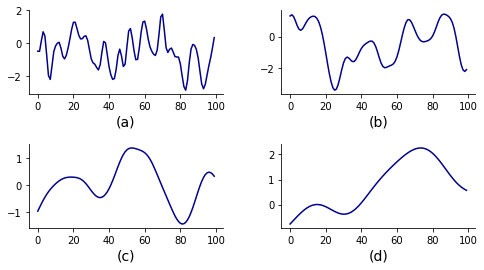

In [12]:
length_scales = [2, 4, 8, 16]
parameters = [(mu, cov_matrix(x, lambda x1, x2: square_exponential_kernel(x1, x2, length_scale=l)))
              for l in length_scales]
MVG = sampling(parameters)
fig1 = plot_mvg((2,2), MVG)
fig1.savefig("square_exponential.eps")

**Figure 1**: Samples from a MVN with square exponential kernel with $\mu=0$ and $\sigma=1$ for differents length scale ($\ell$). Axis x represent the support and axis y its values. (a) Plot with $\ell=1$, (b) $\ell=4$, (c) $\ell=8$ and (d) $\ell=16$.

# Locally Periodic Kernel


This kernel is the product between the periodic kernel and the square exponential kernel. In Figure 2 we observe that to higher periodicity (p) lower is the distance between repetitions. Also, to difference of periodic kernel, this kernel allows periodicity without repeating exactly the same pattern, allowing variations over time that are smother to higher $\ell$.

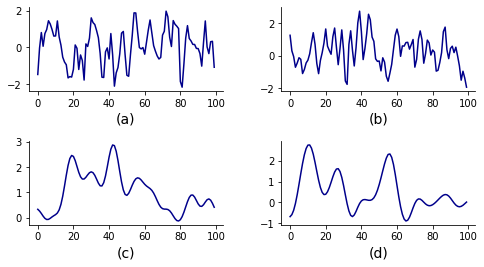

In [13]:
length_scales = [1, 5]
periods = [0.1, 1]
parameters = [(mu, cov_matrix(x, lambda x1, x2: locally_periodic_kernel(x1, x2, length_scale=l, sigma=1, periodicity=p)))
              for l in length_scales  for p in periods]

MVG = sampling(parameters, seed=999)
fig2 = plot_mvg((2,2), MVG)
fig2.savefig("locally_periodic.eps")

**Figure 2**: Samples from a MVN with locally periodic kernel with $\mu=0$ and $\sigma=1$ for differents length scale ($\ell$) and periodicity ($p$). Axis x represent the support and axis y its values. (a) Plot with $(\ell=1, p=0.1 )$, (b) $(\ell=1, p=1)$, (c) $(\ell=5, p=0.1)$ and (d) $(\ell=5, p=1)$.

# Linear Plus Periodic Kernel

This kernel is the sum between periodic kernel and linear kernel. In Figure 3 we have some samples from this kernel, we observe that this kernel result in a periodic function with increasing mean. The parameter $\sigma_{v}$ control the mean increment, that is higher to higher $\sigma_{v}$, on the other hand, the $\sigma_{b}$ parameter has an offset behavior, it determine how far from 0 the height of the function will be at zero.

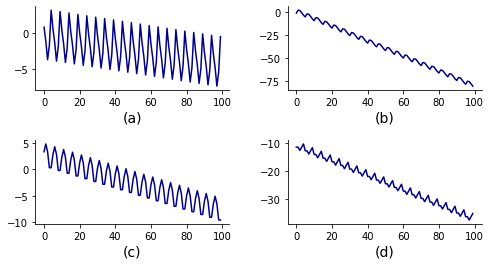

In [66]:
sigma_b = [0, 4]
sigma_v = [0.1, 1]
parameters = [(mu, cov_matrix(x, lambda x1, x2: linear_periodic_kernel(x1, x2, sigma_v=v, sigma_b=b)))
              for b in sigma_b  for v in sigma_v]

MVG = sampling(parameters, seed=5)
fig3 = plot_mvg((2,2), MVG)
fig3.savefig("linear_periodic.eps")


**Figure 3**: Samples from a MVN with linear plus periodic kernel with $(\mu=0, \sigma=2, c=0, \ell=1, p=5)$ for differents $\sigma_{b}$ and $\sigma_{v}$. Axis x represent the support and axis y its values. (a) Plot with $(\sigma_{b}=0, \sigma_{v}=0.01)$, (b) $(\sigma_{b}=0, \sigma_{v}=0.1)$, (c) $(\sigma_{b}=4, \sigma_{v}=0.01)$ and (d) $(\sigma_{b}=4, \sigma_{v}=0.1)$.